### NOTEBOOK CONTENTS

    For January and July (averaged fields):
        plots of averaged: DIC, DIC-TA, & OmA sens. to changes in DIC
        2 cases: blanket 10 umol DIC perturbation, and BR-PI perturbation

### Leading questions:

####  Which regions/ times of year have more DIC difference (PI vs BR)?
    
    - time of year doesn't matter.
    - inner strait has more of a DIC difference than JdF (though blotchy (plume))
    

#### Are different regions of the SS/ times of year more sensitive to perturbations in DIC? 

#### Does this track with a large TA-DIC?

#### When doing a uniform 10 $\mu$ mol perturbation, where is the change in Omega most pronounced?
    -





In [18]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


In [19]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')

In [20]:
from __future__ import print_function
from numpy import *
from scipy import *
import matplotlib.pyplot as plt

import matplotlib.pyplot as plt
import netCDF4 as nc
import numpy as np
import scipy as sp
import warnings
warnings.filterwarnings('ignore')

import seawater
import datetime as dt
""
from salishsea_tools import (
    nc_tools,
    viz_tools,
    geo_tools,
    tidetools
)

import matplotlib
matplotlib.use('Agg')
import matplotlib.pyplot as plt
import matplotlib.patches as patches
plt.style.use('seaborn-whitegrid')
import netCDF4 as nc

import cmocean as cm
import glob
import sys
sys.path.append('/data/tjarniko/mocsy')
sys.path.append('/data/tjarniko/MEOPAR/at3/notebooks/carbon_dev/CCCmaDEV/CCCma_src')
import mocsy
import CCCma
import CCCma_stations as cs
from matplotlib import reload
import arrow
import gsw
%matplotlib inline

import xarray as xr
from datetime import datetime
from salishsea_tools import grid_tools, viz_tools




In [21]:
def mocsy_2d_perturb(carp,grid, depth_ind, perturb):
    
    #retrieve relevant data for mocsy calculation, calculate mocsy
    tsal = grid.variables['vosaline'][0,depth_ind,:,:]
    ttemp = grid.variables['votemper'][0,depth_ind,:,:]
    tdic = carp.variables['dissolved_inorganic_carbon'][0,depth_ind,:,:]-perturb
    tta = carp.variables['total_alkalinity'][0,depth_ind,:,:]

    tsra = np.ravel(tsal)
    ttera = np.ravel(ttemp)
    ttara = np.ravel(tta) * 1e-3
    tdra = np.ravel(tdic) * 1e-3
    tzero = np.zeros_like(tsra)
    tpressure = np.zeros_like(tsra)
    tpressure[:] =1
    tzero = tpressure * 0 
        
    tsra_psu = tsra*35/35.16504
    ttera_is = gsw.t_from_CT(tsra,ttera,tzero)

    response_tup = mocsy.mvars(temp=ttera_is, sal=tsra_psu, alk=ttara, dic=tdra, 
                       sil=tzero, phos=tzero, patm=tpressure, depth=tzero, lat=tzero, 
                        optcon='mol/m3', optt='Tinsitu', optp='m',
                        optb = 'l10', optk1k2='m10', optkf = 'dg', optgas = 'Pinsitu')
    pH,pco2,fco2,co2,hco3,co3,OmegaA,OmegaC,BetaD,DENis,p,Tis = response_tup


    OmegaAR = OmegaA.reshape(898,398)
    return OmegaAR

## July 2015

In [22]:
expname = 'PI_3rd_2015'
mon = 'jan'
carp_path = f'/data/tjarniko/results/BASERUN_EXP/{expname}/MONTHLY/SKOG_1m_2015{mon}_2015{mon}_carp_T.nc'
grid_path = f'/data/tjarniko/results/BASERUN_EXP/{expname}/MONTHLY/SKOG_1m_2015{mon}_2015{mon}_grid_T.nc'

jan_PI_carp = nc.Dataset(carp_path)
jan_PI_grid = nc.Dataset(grid_path)

expname = 'BR_2nd_2015'
mon = 'jan'
carp_path = f'/data/tjarniko/results/BASERUN_EXP/{expname}/MONTHLY/SKOG_1m_2015{mon}_2015{mon}_carp_T.nc'
grid_path = f'/data/tjarniko/results/BASERUN_EXP/{expname}/MONTHLY/SKOG_1m_2015{mon}_2015{mon}_grid_T.nc'

jan_BR_carp = nc.Dataset(carp_path)
jan_BR_grid = nc.Dataset(grid_path)

expname = 'PI_3rd_2015'
mon = 'jul'
carp_path = f'/data/tjarniko/results/BASERUN_EXP/{expname}/MONTHLY/SKOG_1m_2015{mon}_2015{mon}_carp_T.nc'
grid_path = f'/data/tjarniko/results/BASERUN_EXP/{expname}/MONTHLY/SKOG_1m_2015{mon}_2015{mon}_grid_T.nc'

jul_PI_carp = nc.Dataset(carp_path)
jul_PI_grid = nc.Dataset(grid_path)

expname = 'BR_2nd_2015'
mon = 'jul'
carp_path = f'/data/tjarniko/results/BASERUN_EXP/{expname}/MONTHLY/SKOG_1m_2015{mon}_2015{mon}_carp_T.nc'
grid_path = f'/data/tjarniko/results/BASERUN_EXP/{expname}/MONTHLY/SKOG_1m_2015{mon}_2015{mon}_grid_T.nc'

jul_BR_carp = nc.Dataset(carp_path)
jul_BR_grid = nc.Dataset(grid_path)

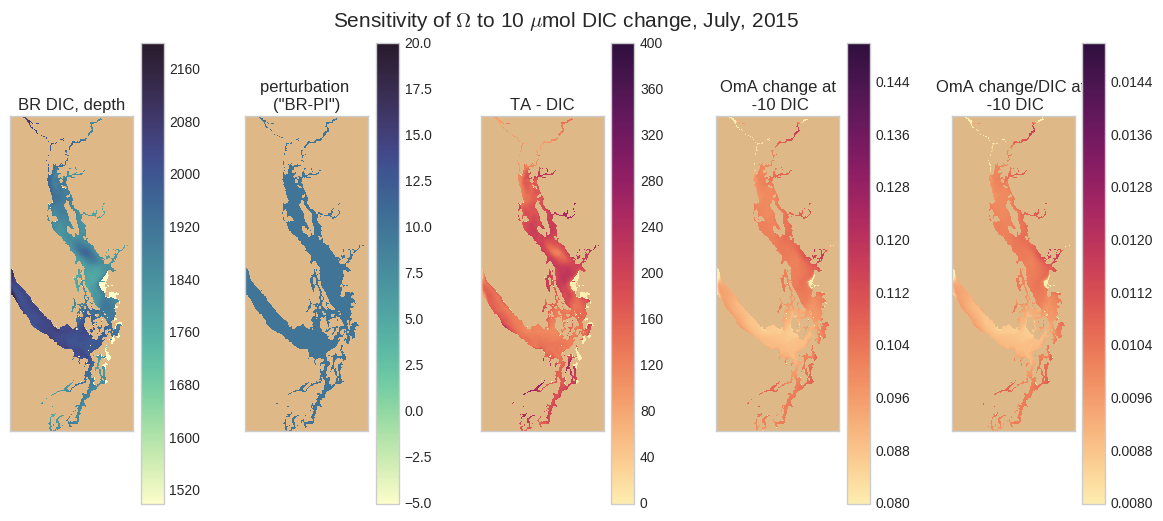

In [23]:
sz = 1
fig = plt.figure(figsize=(12*sz,5.5*sz))
tx = 265
ty = 500
mn = 1500
mx = 2200
depth = 0
carp = jul_BR_carp
grid = jul_BR_grid
date = 'July, 2015'
depthind = 10

ax1 = fig.add_subplot(1,5,1)
cmap = cm.cm.deep
tplt = jul_BR_carp.variables['dissolved_inorganic_carbon'][0,depthind,:,:]
viz_tools.set_aspect(ax1)
mesh = ax1.pcolormesh(tplt, cmap=cm.cm.deep, vmin=mn, vmax=mx)
viz_tools.plot_land_mask(ax1, '/data/tjarniko/MEOPAR/NEMO-forcing/grid/bathy_meter_SalishSea2.nc', color = 'burlywood')
cbar = plt.colorbar(mesh)
ax1.set_title('BR DIC, depth')

ax2 = fig.add_subplot(1,5,2)
cmap = cm.cm.deep
tplt = jul_BR_carp.variables['dissolved_inorganic_carbon'][0,depthind,:,:]\
-(jul_BR_carp.variables['dissolved_inorganic_carbon'][0,depthind,:,:]-10)
viz_tools.set_aspect(ax2)
mesh = ax2.pcolormesh(tplt, cmap=cm.cm.deep, vmin=-5, vmax=20)
viz_tools.plot_land_mask(ax2, '/data/tjarniko/MEOPAR/NEMO-forcing/grid/bathy_meter_SalishSea2.nc', color = 'burlywood')
cbar = plt.colorbar(mesh)
ax2.set_title('perturbation \n("BR-PI")')

ax3 = fig.add_subplot(1,5,3)
tplt = jul_BR_carp.variables['total_alkalinity'][0,depthind,:,:]\
-jul_BR_carp.variables['dissolved_inorganic_carbon'][0,depthind,:,:]
viz_tools.set_aspect(ax3)
mesh = ax3.pcolormesh(tplt, cmap=cm.cm.matter, vmin=0, vmax=400)
viz_tools.plot_land_mask(ax3, '/data/tjarniko/MEOPAR/NEMO-forcing/grid/bathy_meter_SalishSea2.nc', color = 'burlywood')
cbar = plt.colorbar(mesh)
ax3.set_title('TA - DIC')

ax4 = fig.add_subplot(1,5,4)
OmA_R = mocsy_2d_perturb(carp,grid, 0, 0)
OmA_R_p = mocsy_2d_perturb(carp,grid, 0, 10)
OmA_diff = OmA_R_p - OmA_R 
tplt = OmA_diff
viz_tools.set_aspect(ax4)
mesh = ax4.pcolormesh(tplt, cmap=cm.cm.matter, vmin=.08, vmax=.15)
viz_tools.plot_land_mask(ax4, '/data/tjarniko/MEOPAR/NEMO-forcing/grid/bathy_meter_SalishSea2.nc', color = 'burlywood')
cbar = plt.colorbar(mesh)
ax4.set_title('OmA change at\n -10 DIC')

ax5 = fig.add_subplot(1,5,5)
OmA_R = mocsy_2d_perturb(carp,grid, 0, 0)
OmA_R_p = mocsy_2d_perturb(carp,grid, 0, 10)
OmA_diff = OmA_R_p - OmA_R 
tplt = OmA_diff
viz_tools.set_aspect(ax5)

mesh = ax5.pcolormesh(tplt/10, cmap=cm.cm.matter, vmin=.008, vmax=.015)
viz_tools.plot_land_mask(ax5, '/data/tjarniko/MEOPAR/NEMO-forcing/grid/bathy_meter_SalishSea2.nc', color = 'burlywood')
cbar = plt.colorbar(mesh)
ax5.set_title('OmA change/DIC at \n -10 DIC')

plt.suptitle('Sensitivity of $\Omega$ to 10 $\mu$mol DIC change, ' + date,fontsize = 15)
plt.tight_layout()

for ax in fig.axes:
    ax.set_xticks([])
    ax.set_yticks([])



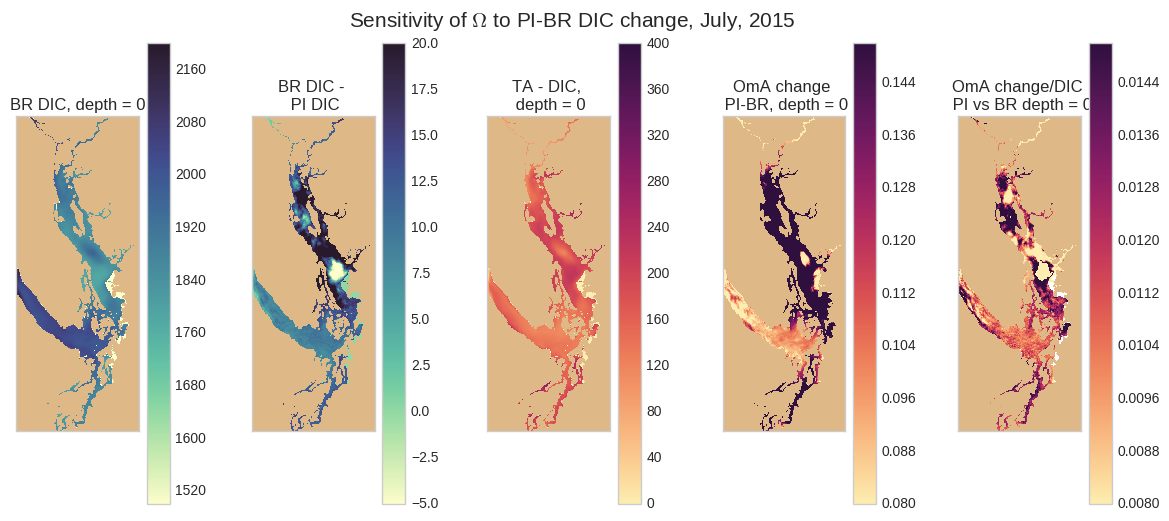

In [24]:
sz = 1
fig = plt.figure(figsize=(12*sz,5.5*sz))
mn = 1500
mx = 2200
depth = 0
carp = jul_BR_carp
carp_p = jul_PI_carp
grid = jul_BR_grid


ax1 = fig.add_subplot(1,5,1)
cmap = cm.cm.deep
tplt = jul_BR_carp.variables['dissolved_inorganic_carbon'][0,depthind,:,:]
viz_tools.set_aspect(ax1)
mesh = ax1.pcolormesh(tplt, cmap=cm.cm.deep, vmin=mn, vmax=mx)
viz_tools.plot_land_mask(ax1, '/data/tjarniko/MEOPAR/NEMO-forcing/grid/bathy_meter_SalishSea2.nc', color = 'burlywood')
cbar = plt.colorbar(mesh)
ax1.set_title('BR DIC, depth = '+str(depth))

ax2 = fig.add_subplot(1,5,2)
cmap = cm.cm.deep
tplt = jul_BR_carp.variables['dissolved_inorganic_carbon'][0,depthind,:,:]-jul_PI_carp.variables['dissolved_inorganic_carbon'][0,depthind,:,:]
viz_tools.set_aspect(ax2)
mesh = ax2.pcolormesh(tplt, cmap=cm.cm.deep, vmin=-5, vmax=20)
viz_tools.plot_land_mask(ax2, '/data/tjarniko/MEOPAR/NEMO-forcing/grid/bathy_meter_SalishSea2.nc', color = 'burlywood')
cbar = plt.colorbar(mesh)
ax2.set_title('BR DIC - \n PI DIC')

ax3 = fig.add_subplot(1,5,3)
tplt = jul_BR_carp.variables['total_alkalinity'][0,depthind,:,:]\
-jul_BR_carp.variables['dissolved_inorganic_carbon'][0,depthind,:,:]
viz_tools.set_aspect(ax3)
mesh = ax3.pcolormesh(tplt, cmap=cm.cm.matter, vmin=0, vmax=400)
viz_tools.plot_land_mask(ax3, '/data/tjarniko/MEOPAR/NEMO-forcing/grid/bathy_meter_SalishSea2.nc', color = 'burlywood')
cbar = plt.colorbar(mesh)
ax3.set_title('TA - DIC, \n depth = '+str(depth))

ax4 = fig.add_subplot(1,5,4)
carp_p = jul_PI_carp
carp = jul_BR_carp
#present day
# OmA_R = mocsy_2d_perturb(carp,grid, 0, 0)
#minus 10 
# OmA_R_p = mocsy_2d_perturb(carp,grid, 0, 10)
# OmA_diff = OmA_R_p - OmA_R 
OmA_R = mocsy_2d_perturb(carp,grid, 0, 0)
OmA_R_p = mocsy_2d_perturb(carp_p,grid, 0, 0)
OmA_diff = OmA_R_p - OmA_R 
tplt = OmA_diff
viz_tools.set_aspect(ax4)
mesh = ax4.pcolormesh(tplt, cmap=cm.cm.matter, vmin=.08, vmax=.15)
viz_tools.plot_land_mask(ax4, '/data/tjarniko/MEOPAR/NEMO-forcing/grid/bathy_meter_SalishSea2.nc', color = 'burlywood')
cbar = plt.colorbar(mesh)
ax4.set_title('OmA change \n PI-BR, depth = '+str(depth))

ax5 = fig.add_subplot(1,5,5)


PI_DIC = jul_PI_carp.variables['dissolved_inorganic_carbon'][0,depthind,:,:]
BR_DIC = jul_BR_carp.variables['dissolved_inorganic_carbon'][0,depthind,:,:]
tplt = OmA_diff/(BR_DIC-PI_DIC)
viz_tools.set_aspect(ax5)

mesh = ax5.pcolormesh(tplt, cmap=cm.cm.matter, vmin=.008, vmax=.015)
viz_tools.plot_land_mask(ax5, '/data/tjarniko/MEOPAR/NEMO-forcing/grid/bathy_meter_SalishSea2.nc', color = 'burlywood')
cbar = plt.colorbar(mesh)
ax5.set_title('OmA change/DIC \n PI vs BR depth = '+str(depth))

plt.suptitle('Sensitivity of $\Omega$ to PI-BR DIC change, ' + date,fontsize = 15)
plt.tight_layout()

for ax in fig.axes:
    ax.set_xticks([])
    ax.set_yticks([])



## January 2015

In [25]:
BR_path = '/data/tjarniko/results/BASERUN_EXP/BR_2nd_2015/MONTHLY/'
PI_path = '/data/tjarniko/results/BASERUN_EXP/PI_3rd_2015/MONTHLY/'
daystr_c ='SKOG_1m_2015jan_2015jan_carp_T.nc'
daystr_g ='SKOG_1m_2015jan_2015jan_grid_T.nc'
daystr_c_PI ='SKOG_1m_2015jan_2015jan_carp_T.nc'
daystr_g_PI ='SKOG_1m_2015jan_2015jan_grid_T.nc'
t_daystr_c = glob.glob(BR_path+daystr_c)
t_daystr_g = glob.glob(BR_path+daystr_g)
BR_jul15_c = nc.Dataset(t_daystr_c[0])
BR_jul15_g = nc.Dataset(t_daystr_g[0])
t_daystr_c = glob.glob(PI_path+daystr_c_PI)
t_daystr_g = glob.glob(PI_path+daystr_g_PI)
PI_jul15_c = nc.Dataset(t_daystr_c[0])
PI_jul15_g = nc.Dataset(t_daystr_g[0])

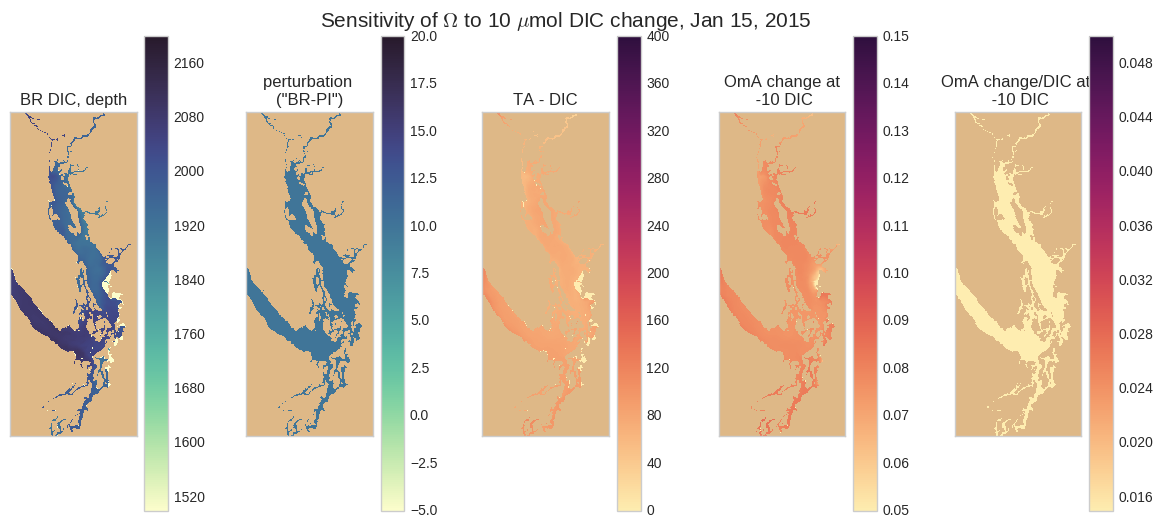

In [29]:
sz = 1
fig = plt.figure(figsize=(12*sz,5.5*sz))
tx = 265
ty = 500
mn = 1500
mx = 2200
depth = 0
carp = BR_jul15_c
grid = BR_jul15_g
date = 'Jan 15, 2015'


ax1 = fig.add_subplot(1,5,1)
cmap = cm.cm.deep
tplt = BR_jul15_c.variables['dissolved_inorganic_carbon'][0,depthind,:,:]
viz_tools.set_aspect(ax1)
mesh = ax1.pcolormesh(tplt, cmap=cm.cm.deep, vmin=mn, vmax=mx)
viz_tools.plot_land_mask(ax1, '/data/tjarniko/MEOPAR/NEMO-forcing/grid/bathy_meter_SalishSea2.nc', color = 'burlywood')
cbar = plt.colorbar(mesh)
ax1.set_title('BR DIC, depth')

ax2 = fig.add_subplot(1,5,2)
cmap = cm.cm.deep
tplt = BR_jul15_c.variables['dissolved_inorganic_carbon'][0,depthind,:,:]\
-(BR_jul15_c.variables['dissolved_inorganic_carbon'][0,depthind,:,:]-10)
viz_tools.set_aspect(ax2)
mesh = ax2.pcolormesh(tplt, cmap=cm.cm.deep, vmin=-5, vmax=20)
viz_tools.plot_land_mask(ax2, '/data/tjarniko/MEOPAR/NEMO-forcing/grid/bathy_meter_SalishSea2.nc', color = 'burlywood')
cbar = plt.colorbar(mesh)
ax2.set_title('perturbation \n("BR-PI")')

ax3 = fig.add_subplot(1,5,3)
tplt = BR_jul15_c.variables['total_alkalinity'][0,depthind,:,:]\
-BR_jul15_c.variables['dissolved_inorganic_carbon'][0,depthind,:,:]
viz_tools.set_aspect(ax3)
mesh = ax3.pcolormesh(tplt, cmap=cm.cm.matter, vmin=0, vmax=400)
viz_tools.plot_land_mask(ax3, '/data/tjarniko/MEOPAR/NEMO-forcing/grid/bathy_meter_SalishSea2.nc', color = 'burlywood')
cbar = plt.colorbar(mesh)
ax3.set_title('TA - DIC')

ax4 = fig.add_subplot(1,5,4)
OmA_R = mocsy_2d_perturb(carp,grid, 0, 0)
OmA_R_p = mocsy_2d_perturb(carp,grid, 0, 10)
OmA_diff = OmA_R_p - OmA_R 
tplt = OmA_diff
viz_tools.set_aspect(ax4)
mesh = ax4.pcolormesh(tplt, cmap=cm.cm.matter, vmin=.05, vmax=.15)
viz_tools.plot_land_mask(ax4, '/data/tjarniko/MEOPAR/NEMO-forcing/grid/bathy_meter_SalishSea2.nc', color = 'burlywood')
cbar = plt.colorbar(mesh)
ax4.set_title('OmA change at\n -10 DIC')

ax5 = fig.add_subplot(1,5,5)
OmA_R = mocsy_2d_perturb(carp,grid, 0, 0)
OmA_R_p = mocsy_2d_perturb(carp,grid, 0, 10)
OmA_diff = OmA_R_p - OmA_R 
tplt = OmA_diff
viz_tools.set_aspect(ax5)

mesh = ax5.pcolormesh(tplt/10, cmap=cm.cm.matter, vmin=.05, vmax=.015)
viz_tools.plot_land_mask(ax5, '/data/tjarniko/MEOPAR/NEMO-forcing/grid/bathy_meter_SalishSea2.nc', color = 'burlywood')
cbar = plt.colorbar(mesh)
ax5.set_title('OmA change/DIC at \n -10 DIC')

plt.suptitle('Sensitivity of $\Omega$ to 10 $\mu$mol DIC change, ' + date,fontsize = 15)
plt.tight_layout()

for ax in fig.axes:
    ax.set_xticks([])
    ax.set_yticks([])



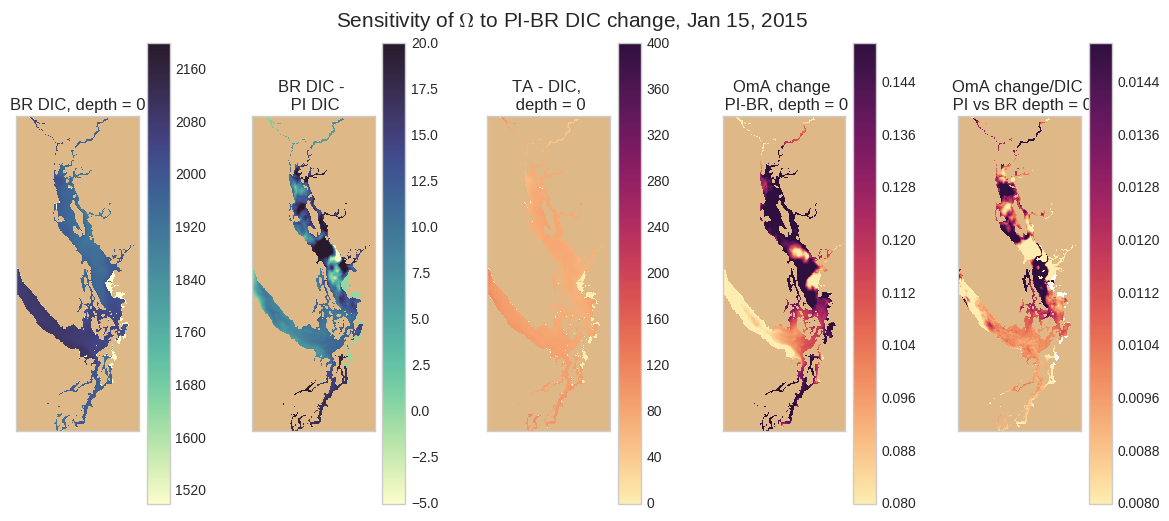

In [27]:
sz = 1
fig = plt.figure(figsize=(12*sz,5.5*sz))
mn = 1500
mx = 2200
depth = 0
carp = BR_jul15_c
carp_p = PI_jul15_c
grid = BR_jul15_g



ax1 = fig.add_subplot(1,5,1)
cmap = cm.cm.deep
tplt = BR_jul15_c.variables['dissolved_inorganic_carbon'][0,depthind,:,:]
viz_tools.set_aspect(ax1)
mesh = ax1.pcolormesh(tplt, cmap=cm.cm.deep, vmin=mn, vmax=mx)
viz_tools.plot_land_mask(ax1, '/data/tjarniko/MEOPAR/NEMO-forcing/grid/bathy_meter_SalishSea2.nc', color = 'burlywood')
cbar = plt.colorbar(mesh)
ax1.set_title('BR DIC, depth = '+str(depth))

ax2 = fig.add_subplot(1,5,2)
cmap = cm.cm.deep
tplt = BR_jul15_c.variables['dissolved_inorganic_carbon'][0,depthind,:,:]-PI_jul15_c.variables['dissolved_inorganic_carbon'][0,depthind,:,:]
viz_tools.set_aspect(ax2)
mesh = ax2.pcolormesh(tplt, cmap=cm.cm.deep, vmin=-5, vmax=20)
viz_tools.plot_land_mask(ax2, '/data/tjarniko/MEOPAR/NEMO-forcing/grid/bathy_meter_SalishSea2.nc', color = 'burlywood')
cbar = plt.colorbar(mesh)
ax2.set_title('BR DIC - \n PI DIC')

ax3 = fig.add_subplot(1,5,3)
tplt = BR_jul15_c.variables['total_alkalinity'][0,depthind,:,:]\
-BR_jul15_c.variables['dissolved_inorganic_carbon'][0,depthind,:,:]
viz_tools.set_aspect(ax3)
mesh = ax3.pcolormesh(tplt, cmap=cm.cm.matter, vmin=0, vmax=400)
viz_tools.plot_land_mask(ax3, '/data/tjarniko/MEOPAR/NEMO-forcing/grid/bathy_meter_SalishSea2.nc', color = 'burlywood')
cbar = plt.colorbar(mesh)
ax3.set_title('TA - DIC, \n depth = '+str(depth))

ax4 = fig.add_subplot(1,5,4)
carp_p = PI_jul15_c
carp = BR_jul15_c

OmA_R = mocsy_2d_perturb(carp,grid, 0, 0)
OmA_R_p = mocsy_2d_perturb(carp_p,grid, 0, 0)
OmA_diff = OmA_R_p - OmA_R 
tplt = OmA_diff
viz_tools.set_aspect(ax4)
mesh = ax4.pcolormesh(tplt, cmap=cm.cm.matter, vmin=.08, vmax=.15)
viz_tools.plot_land_mask(ax4, '/data/tjarniko/MEOPAR/NEMO-forcing/grid/bathy_meter_SalishSea2.nc', color = 'burlywood')
cbar = plt.colorbar(mesh)
ax4.set_title('OmA change \n PI-BR, depth = '+str(depth))

ax5 = fig.add_subplot(1,5,5)


PI_DIC = PI_jul15_c.variables['dissolved_inorganic_carbon'][0,depthind,:,:]
BR_DIC = BR_jul15_c.variables['dissolved_inorganic_carbon'][0,depthind,:,:]
tplt = OmA_diff/(BR_DIC-PI_DIC)
viz_tools.set_aspect(ax5)

mesh = ax5.pcolormesh(tplt, cmap=cm.cm.matter, vmin=.008, vmax=.015)
viz_tools.plot_land_mask(ax5, '/data/tjarniko/MEOPAR/NEMO-forcing/grid/bathy_meter_SalishSea2.nc', color = 'burlywood')
cbar = plt.colorbar(mesh)
ax5.set_title('OmA change/DIC \n PI vs BR depth = '+str(depth))

plt.suptitle('Sensitivity of $\Omega$ to PI-BR DIC change, ' + date,fontsize = 15)
plt.tight_layout()

for ax in fig.axes:
    ax.set_xticks([])
    ax.set_yticks([])

